(10, 50, 50)


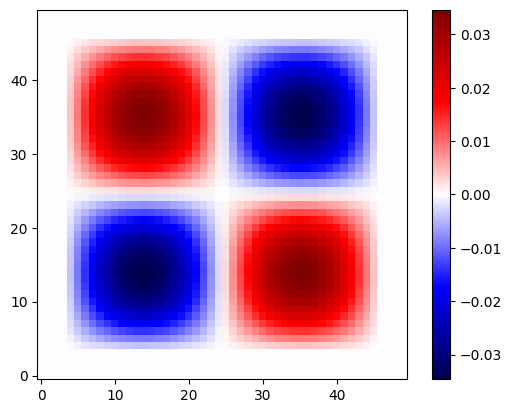

In [1]:
# read true model from hdf5 file
ftrue = "./test_model_true.h5"

import h5py

with h5py.File(ftrue, 'r') as f:
    eta_true = f['eta'][:]
    xi_true = f['xi'][:]
    zeta_true = f['zeta'][:]
    vel_true = f['vel'][:]

# check the shape of the arrays
print(eta_true.shape)

# plot
import matplotlib.pyplot as plt
plt.imshow(eta_true[0,:,:], cmap='seismic')
# inverse y
plt.gca().invert_yaxis()
# color bar
plt.colorbar()


/home/mnagaso/.pyenv/versions/3.10.8/lib/python3.10/abc.py:106: FutureWarning: xarray subclass Dataset should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


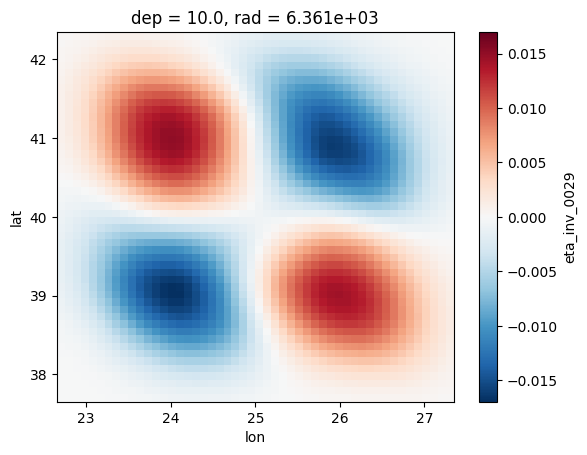

In [2]:
# read the calculate values

fres_data = "OUTPUT_FILES/out_data_sim.h5"
fres_grid = "OUTPUT_FILES/out_data_grid.h5"

from pytomoatt.data import *
attdata = ATTData.read(fres_data,
                      './input_params.yml',
                        fres_grid, 
                       format='hdf5')

ax = attdata.to_xarray()

ax['eta_inv_0029'][0,:,:].plot(x='lon', y='lat')


In [3]:
ax

<xarray.Dataset>
Dimensions:       (r: 10, t: 50, p: 50)
Coordinates:
    dep           (r) float64 10.0 7.778 5.556 3.333 ... -5.556 -7.778 -10.0
    rad           (r) float64 6.361e+03 6.363e+03 ... 6.379e+03 6.381e+03
    lat           (t) float64 37.7 37.79 37.89 37.98 ... 42.02 42.11 42.21 42.3
    lon           (p) float64 22.7 22.79 22.89 22.98 ... 27.02 27.11 27.21 27.3
Dimensions without coordinates: r, t, p
Data variables: (12/90)
    eta_inv_0001  (r, t, p) float64 3.094e-05 3.827e-05 ... 2.974e-07 2.096e-07
    eta_inv_0002  (r, t, p) float64 6.748e-05 8.346e-05 ... 6.182e-07 4.369e-07
    eta_inv_0003  (r, t, p) float64 9.108e-05 0.0001125 ... 8.88e-07 6.293e-07
    eta_inv_0004  (r, t, p) float64 9e-05 0.0001106 ... 1.108e-06 7.869e-07
    eta_inv_0005  (r, t, p) float64 4.428e-05 5.273e-05 ... 1.251e-06 8.914e-07
    eta_inv_0006  (r, t, p) float64 -4.276e-05 -5.687e-05 ... 8.875e-07
    ...            ...
    xi_inv_0025   (r, t, p) float64 -2.307e-05 -6.187e-05 ... -2.291e-06
    xi_inv_0026   (r, t, p) float64 -3.233e-05 -7.32e-05 ... -2.331e-06
    xi_inv_0027   (r, t, p) float64 -2.429e-05 -6.387e-05 ... -2.312e-06
    xi_inv_0028   (r, t, p) float64 -3.359e-05 -7.502e-05 ... -2.342e-06
    xi_inv_0029   (r, t, p) float64 -2.636e-05 -6.656e-05 ... -2.325e-06
    xi_inv_0030   (r, t, p) float64 -3.402e-05 -7.566e-05 ... -2.352e-06

In [4]:
# calculate the RMAE for each step for vel xi eta

rmae_vel = []
rmae_xi = []
rmae_eta = []

n_steps = 30

for i in range(1,n_steps+1):
    # get value from ax
    vel = ax['vel_inv_{}'.format(str(i).zfill(4))][:,:,:].data
    xi = ax['xi_inv_{}'.format(str(i).zfill(4))][:,:,:].data
    eta = ax['eta_inv_{}'.format(str(i).zfill(4))][:,:,:].data

    # calculate rmae
    r_vel = np.sum(np.abs(vel - vel_true))/np.sum(np.abs(vel_true)) * 100
    r_xi = np.sum(np.abs(xi - xi_true))/np.sum(np.abs(xi_true)) * 100
    r_eta = np.sum(np.abs(eta - eta_true))/np.sum(np.abs(eta_true)) * 100

    # append to list
    rmae_vel.append(r_vel)
    rmae_xi.append(r_xi)
    rmae_eta.append(r_eta)



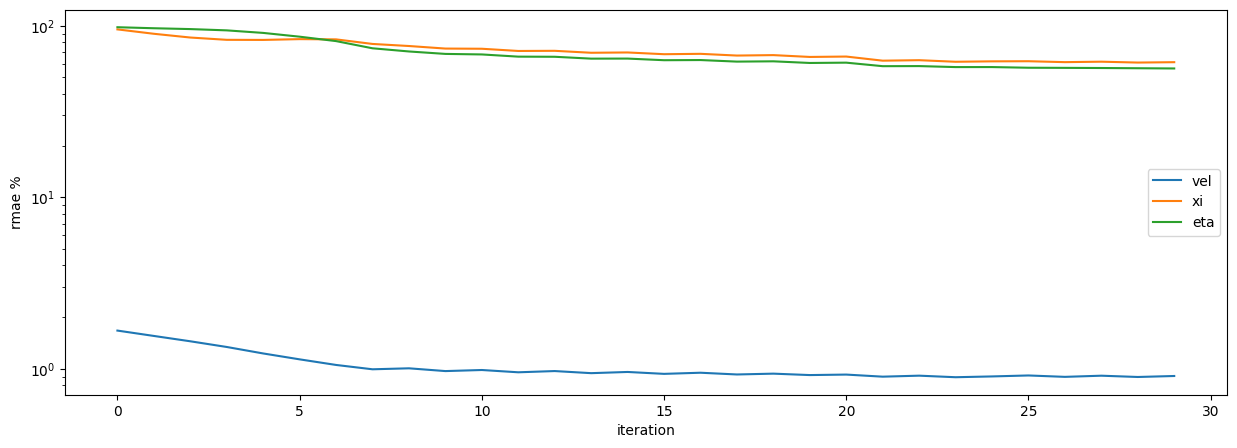

In [5]:
#plot rmae_* arrays

import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(15, 5))
plt.plot(rmae_vel, label='vel')
plt.plot(rmae_xi, label='xi')
plt.plot(rmae_eta, label='eta')

# y log
plt.yscale('log')

# x axis is iteration number
plt.xlabel('iteration')
plt.ylabel('rmae %')
plt.legend()